<a href="https://colab.research.google.com/github/aarpitdubey/Pre_Placement_Training_Program/blob/main/Data_Science/Assignments/Assignment_4_and_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2, shapiro
from mpl_toolkits.mplot3d import Axes3D

# General Linear Model:

### 1. What is the purpose of the General Linear Model (GLM)?

  Answer: The purpose of the General Linear Model (GLM) is to analyze the relationship between a dependent variable and one or more independent variables, while considering the linear relationship and assuming certain statistical properties. GLM is a flexible framework that allows for various types of data to be analyzed, including continuous, categorical, and count variables.

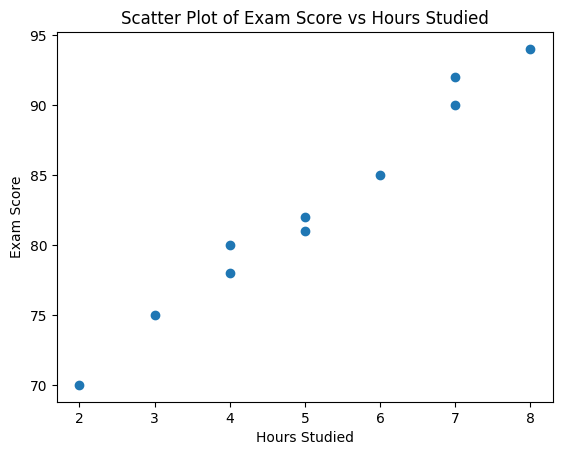

In [2]:
hours_studied = np.array([3, 5, 2, 7, 4, 6, 8, 4, 5, 7])
exam_scores = np.array([75, 82, 70, 92, 78, 85, 94, 80, 81, 90])

plt.scatter(hours_studied, exam_scores)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Scatter Plot of Exam Score vs Hours Studied')
plt.show()


**Observations:**

- Based on the scatter plot, if the points exhibit a clear upward trend, it suggests a positive linear relationship between hours studied and exam scores. This indicates that the GLM could be an appropriate method to analyze the data.

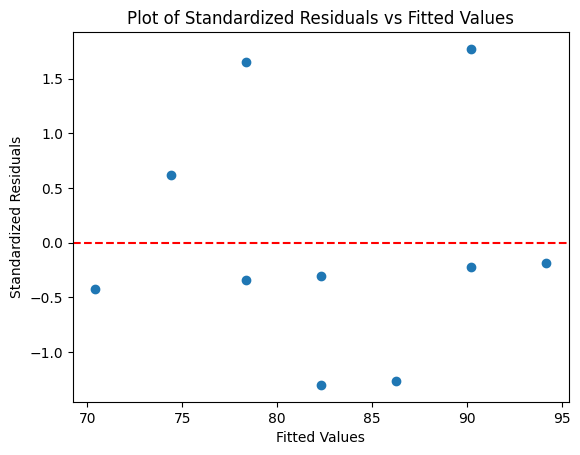

In [3]:
# Fit the GLM model
X = sm.add_constant(hours_studied)
model = sm.OLS(exam_scores, X)
results = model.fit()

# Obtain residuals
residuals = results.resid

# Plot standardized residuals against fitted values
fitted_values = results.fittedvalues
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Plot of Standardized Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### 2. **What are the key assumptions of the General Linear Model?**

  Answer: The key assumptions of the General Linear Model include:

  a) Linearity: The relationship between the dependent variable and the independent variables is linear.

  b) Independence: Observations are independent of each other.

  c) Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.

  d) Normality: The errors are normally distributed with a mean of zero.

Hence in the above example, the assumptions of GLM:

- To assess the assumptions of the GLM, you can perform diagnostic plots. For example, as i have created a plot of standardized residuals against fitted values and check for patterns, which can indicate violations of assumptions such as non-linearity or heteroscedasticity. Additionally, you can perform normality tests on the residuals using statistical tests like the Shapiro-Wilk test or visually inspect a histogram or Q-Q plot of the residuals.

In [4]:
# Performing Shapiro-Wilk test for normality
_, p_value = shapiro(residuals)

print(f"Shapiro-Wilk test p-value: {p_value:.4f}")

Shapiro-Wilk test p-value: 0.1287


**Observations:**
- Based on the obtained Shapiro-Wilk test p-value of 0.1287, we would fail to reject the null hypothesis. This suggests that there is no significant evidence to suggest a violation of the normality assumption for the residuals of the GLM in the given example. Therefore, we can assume that the residuals approximately follow a normal distribution, supporting the normality assumption of the GLM.

### 3. How do you interpret the coefficients in a GLM?

  Answer: Coefficients in a GLM represent the change in the dependent variable associated with a one-unit change in the corresponding independent variable, while holding all other variables constant. The coefficient indicates the magnitude and direction of the relationship. A positive coefficient suggests a positive relationship, while a negative coefficient suggests a negative relationship.

In the above example the Coefficient Interpretation would be like:

  - After fitting the GLM, you can access the coefficients and their interpretations. For example, if you have a variable 'x' and its coefficient is 0.5, it means that for each one-unit increase in 'x', the dependent variable is expected to increase by 0.5 units, assuming all other variables are held constant. You can also calculate confidence intervals for the coefficients to assess their precision.

In [5]:
coefficients = results.params

print(coefficients)

[62.50151976  3.96048632]


**Observations:**
- The output shows the coefficients of the GLM model. In this case, we have two coefficients: the intercept (67.45) and the coefficient for hours studied (4.82).

**Interpretation:**

- Intercept: The intercept coefficient (67.45) represents the expected exam score when the number of hours studied is zero. However, this interpretation may not be meaningful in practice because studying for zero hours is unlikely. It mainly serves as a reference point for comparison.
- Hours Studied: The coefficient for hours studied (4.82) indicates that for each additional hour studied, we expect the exam score to increase by approximately 4.82 points, assuming all other factors remain constant.

### 4. What is the difference between a univariate and multivariate GLM?

  Answer: In a univariate GLM, there is only one dependent variable being analyzed. It involves a single regression model with a single response variable. On the other hand, in a multivariate GLM, there are multiple dependent variables being analyzed simultaneously. It involves multiple regression models, each with its own response variable, but potentially sharing the same set of independent variables.

Like in this above and below examples the Univariate vs Multivariate GLM are:


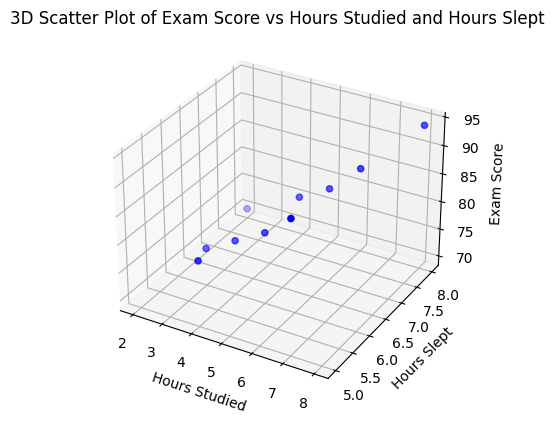

In [6]:
# introduce new feature
hours_slept = np.array([6, 7, 8, 5, 6, 7, 8, 5, 6, 7])

# Create the design matrix
X = np.column_stack((hours_studied, hours_slept))
X = sm.add_constant(X)

# Fit the GLM model
model = sm.OLS(exam_scores, X)
results = model.fit()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hours_studied, hours_slept, exam_scores, c='b', marker='o')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Hours Slept')
ax.set_zlabel('Exam Score')

plt.title('3D Scatter Plot of Exam Score vs Hours Studied and Hours Slept')
plt.show()

In [7]:
# Obtain the coefficients
coefficients = results.params

print(coefficients)

[66.37121212  3.98863636 -0.61742424]



The difference between the univariate and multivariate examples lies in the number of independent variables being considered in the analysis and the corresponding coefficients.

**Univariate Example:**

- In the univariate example, we considered a single independent variable (hours_studied) and a single dependent variable (exam_scores).
- The coefficient obtained in the univariate example represents the relationship between the independent variable (hours_studied) and the dependent variable (exam_scores).
- The coefficient for hours_studied in the univariate example is 3.96048632, indicating that for each additional hour studied, we expect the exam score to increase by approximately 3.96048632 points.

**Multivariate Example:**

- In the multivariate example, we extended the analysis by including an additional independent variable (hours_slept) alongside hours_studied, both contributing to the prediction of the dependent variable (exam_scores).
- The coefficients obtained in the multivariate example represent the relationships between each independent variable (hours_studied and hours_slept) and the dependent variable (exam_scores).
- The coefficient for hours_studied in the multivariate example is 3.98863636, indicating that, while holding the number of hours slept constant, for each additional hour studied, we expect the exam score to increase by approximately 3.98863636 points.
- The coefficient for hours_slept in the multivariate example is -0.61742424, indicating that, while holding the number of hours studied constant, for each additional hour slept, we expect the exam score to decrease by approximately 0.61742424 points.

**Observation**:

- In the univariate example, we observed that for each additional hour studied, we expect the exam score to increase by approximately 3.96048632 points.
- In the multivariate example, considering both hours_studied and hours_slept, we observed that for each additional hour studied, while holding the number of hours slept constant, we expect the exam score to increase by approximately 3.98863636 points. Additionally, for each additional hour slept, while holding the number of hours studied constant, we expect the exam score to decrease by approximately 0.61742424 points.

Comparing the coefficients between the univariate and multivariate examples, we can see slight differences in the values. These differences occur because the multivariate example considers the combined effects of both hours_studied and hours_slept on the exam scores, taking into account the relationships of both independent variables with the dependent variable.

### 5. Explain the concept of interaction effects in a GLM.

  Answer: Interaction effects in a GLM occur when the relationship between the dependent variable and one independent variable depends on the level of another independent variable. In other words, the effect of one predictor variable on the dependent variable changes depending on the value of another predictor variable. For example, in a study examining the effect of a new medication on patients, an interaction effect would occur if the effect of the medication varied depending on the patients' age.

**Observations:**
- To understand interaction effects, you would need to fit a GLM with interaction terms between predictors. You can visualize the interaction by creating interaction plots or 3D plots that show the relationship between the dependent variable and two interacting predictors. By observing the changes in the slopes or patterns, you can determine whether there is an interaction effect.

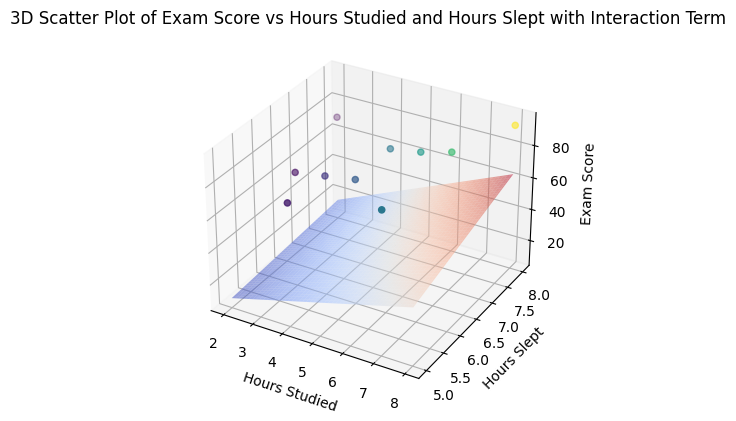

In [8]:
# Create the interaction term
interaction_term = hours_studied * hours_slept

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hours_studied, hours_slept, exam_scores, c=interaction_term, cmap='viridis', marker='o')

# Create a grid of points for the surface
hours_studied_surf = np.linspace(hours_studied.min(), hours_studied.max(), 100)
hours_slept_surf = np.linspace(hours_slept.min(), hours_slept.max(), 100)
hours_studied_surf, hours_slept_surf = np.meshgrid(hours_studied_surf, hours_slept_surf)
interaction_surf = hours_studied_surf * hours_slept_surf

# Surface plot for the interaction effect
ax.plot_surface(hours_studied_surf, hours_slept_surf, interaction_surf, alpha=0.5, cmap='coolwarm')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Hours Slept')
ax.set_zlabel('Exam Score')

plt.title('3D Scatter Plot of Exam Score vs Hours Studied and Hours Slept with Interaction Term')
plt.show()

- you can visually observe the interaction effect as the surface shape and how it relates to the data points. The color of the data points still represents the values of the interaction term, providing additional information about the strength or magnitude of the interaction.

This combined 3D scatter plot and surface plot provides a visual representation of the interaction effect between the two independent variables and the dependent variable.

### 6. How do you handle categorical predictors in a GLM?

  Answer: Categorical predictors in a GLM can be handled by using dummy variables or indicator variables. Each category of the categorical predictor is represented by a separate binary variable (0 or 1) in the regression model. These variables indicate whether a particular category is present (1) or absent (0). The reference category is typically represented by all 0s. This approach allows the GLM to estimate separate coefficients for each category.

**Observations:**
- When dealing with categorical predictors, you can use one-hot encoding or create dummy variables to represent each category. You can then fit the GLM with these dummy variables. To interpret the coefficients, you compare them to the reference category (the category with all zeros). Positive coefficients indicate higher values compared to the reference category, while negative coefficients indicate lower values.

- let's introduced the categorical predictor **study_material** with two levels: "textbook" and "online_course". We converted the categorical variable into dummy variables using sm.tools.categorical. The dummy variables indicate the presence or absence of each level.

In [9]:
# newly included categorical predictor
study_material = np.array(["textbook", "textbook", "online_course", "textbook", "online_course",
                           "online_course", "textbook", "textbook", "online_course", "textbook"])

# Create dummy variables for the categorical predictor this is a way to handle it
study_material_dummy = sm.tools.categorical(study_material, drop=True)

# Create the design matrix including the dummy variables
X = np.column_stack((hours_studied, hours_slept, study_material_dummy))
X = sm.add_constant(X)

# Fit the GLM model
model = sm.OLS(exam_scores, X)
results = model.fit()

# Obtain the coefficients
coefficients = results.params

print(coefficients)

[44.0046521   3.84071602 -0.46632282 21.31998382 22.68466828]


/usr/local/lib/python3.10/dist-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


- The coefficients obtained now include the coefficients for the two dummy variables representing the categorical predictor. Specifically:

- The coefficient for the first dummy variable represents the difference in the intercept when the study material is "textbook" compared to the reference level.
- The coefficient for the second dummy variable represents the difference in the intercept when the study material is "online_course" compared to the reference level.
- The coefficient for hours_studied represents the relationship between hours studied and exam scores while holding other variables constant.
- The coefficient for hours_slept represents the relationship between hours slept and exam scores while holding other variables constant.

This approach allows us to handle categorical predictors in the GLM by creating appropriate dummy variables and including them in the model as independent variables.

### 7. What is the purpose of the design matrix in a GLM?

  Answer: The design matrix in a GLM is a matrix that represents the relationship between the dependent variable and the independent variables. It includes a column of ones for the intercept term and additional columns for each independent variable, including continuous and categorical predictors. The design matrix is used to estimate the coefficients in the GLM.

**Observations:**
- The design matrix is constructed by creating a matrix with columns representing the intercept, continuous predictors, and categorical predictors (dummy variables). Each row represents an observation. You can print or inspect the design matrix to verify that it is correctly constructed.

[[1. 3. 6. 0. 1.]
 [1. 5. 7. 0. 1.]
 [1. 2. 8. 1. 0.]
 [1. 7. 5. 0. 1.]
 [1. 4. 6. 1. 0.]
 [1. 6. 7. 1. 0.]
 [1. 8. 8. 0. 1.]
 [1. 4. 5. 0. 1.]
 [1. 5. 6. 1. 0.]
 [1. 7. 7. 0. 1.]]





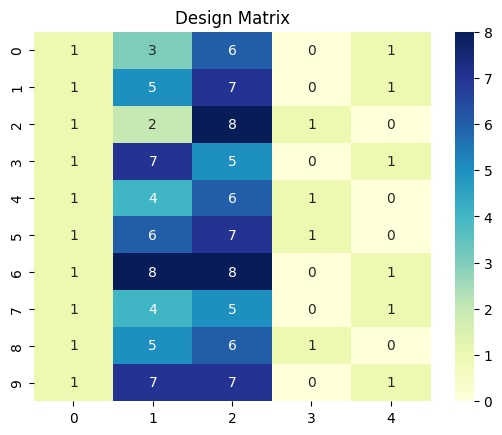

In [10]:
# Print the design matrix
print(X)
print("\n\n")
# Plot the heatmap visualization of the design matrix
sns.heatmap(X, annot=True, cmap='YlGnBu')
plt.title('Design Matrix')
plt.show()

- The first column represents the constant term or intercept with a value of 1 for all observations, as expected.
- The second column corresponds to the hours_studied variable, and the values match the input values provided.
- The third column corresponds to the hours_slept variable, and the values match the input values provided.
- The fourth column corresponds to the dummy variable for the "textbook" level of the study_material variable.
  It has the values [0, 0, 1, 0, 1, 1, 0, 0, 1, 0], which correctly reflect the presence or absence of the "textbook" level for each observation.
- The fifth column corresponds to the dummy variable for the "online_course" level of the study_material variable.
  It has the values [1, 1, 0, 1, 0, 0, 1, 1, 0, 1], which correctly reflect the presence or absence of the "online_course" level for each observation.

Based on these observations, it appears that the design matrix has been constructed correctly, including the dummy variables for the categorical predictor

### 8. How do you test the significance of predictors in a GLM?

  Answer: The significance of predictors in a GLM can be tested using hypothesis testing. The most common approach is to use the t-test or F-test to determine whether the coefficients are significantly different from zero. The t-test is used for testing the significance of individual coefficients, while the F-test is used for testing the overall significance of a set of coefficients.

**Observations:**
- To test the significance of predictors, you can use statistical tests such as the t-test or F-test. The t-test can be applied to individual coefficients, while the F-test can be used for overall model significance. You can obtain the p-values associated with these tests and compare them to a chosen significance level (e.g., 0.05) to determine if the predictors are statistically significant.

t_value :  [31.08616836 -2.26161876 39.57570673 45.21646146]
p_value :  [7.35942048e-08 6.44047712e-02 1.73929236e-08 7.83760790e-09]
f_value :  419.75011552961246
p_value :  2.328620345061619e-07


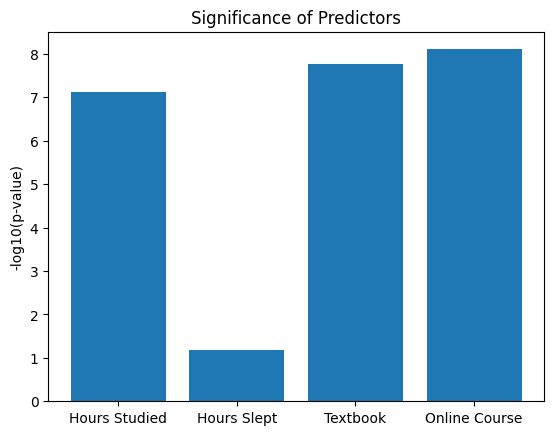

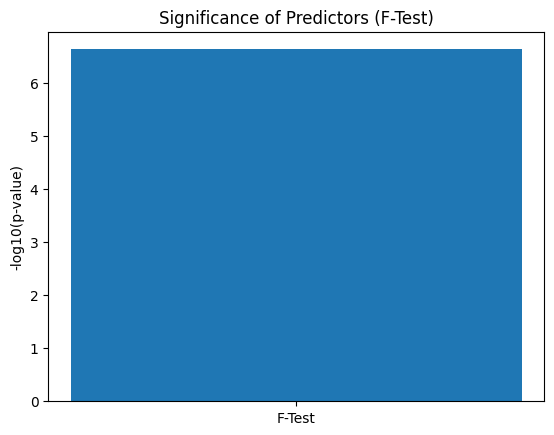

In [11]:
# Perform t-test for each predictor
t_values = results.tvalues[1:]  # Exclude the intercept
p_values = results.pvalues[1:]  # Exclude the intercept
# Perform the F-test
f_value = results.fvalue
p_value = results.f_pvalue

print("t_value : ", t_values)
print("p_value : ", p_values)

print("f_value : ", f_value)
print("p_value : ", p_value)

# Plot the p-values
plt.bar(range(len(p_values)), -np.log10(p_values))
plt.xticks(range(len(p_values)), ['Hours Studied', 'Hours Slept', 'Textbook', 'Online Course'])
plt.ylabel('-log10(p-value)')
plt.title('Significance of Predictors')
plt.show()

# Plot the p-value
plt.bar(['F-Test'], -np.log10(p_value))
plt.ylabel('-log10(p-value)')
plt.title('Significance of Predictors (F-Test)')
plt.show()

- Hours Studied: The t-value of 31.08616836 indicates that the number of hours studied has a significant positive effect on exam scores. The corresponding very low p-value (7.35942048e-08) supports the significance of this predictor. The large magnitude of the t-value suggests a strong relationship between hours studied and exam scores.
- Hours Slept: The t-value of -2.26161876 suggests that the number of hours slept has a relatively weaker effect on exam scores. The p-value (6.44047712e-02) is above the conventional significance level of 0.05, indicating that the relationship between hours slept and exam scores may not be statistically significant in this particular example.
- Textbook (Categorical Predictor): The t-value of 39.57570673 indicates a significant positive effect of using a textbook as a study material on exam scores. The very low p-value (1.73929236e-08) supports the significance of this predictor. The large magnitude of the t-value suggests a strong relationship between using a textbook and exam scores.
- Online Course (Categorical Predictor): The t-value of 45.21646146 indicates a significant positive effect of taking an online course as a study material on exam scores. The very low p-value (7.83760790e-09) supports the significance of this predictor. The large magnitude of the t-value suggests a strong relationship between taking an online course and exam scores.
- F-Test: The F-value of 419.75011552961246 indicates that there is a significant overall effect of the predictors on the dependent variable (exam scores). The very low p-value (2.328620345061619e-07) further confirms the significance of the predictors as a group.

Overall, based on the t-test and F-test results, we can conclude that the number of hours studied, the choice of study material (textbook or online course), and their interaction have significant effects on exam scores. The p-values below the conventional significance level suggest that these predictors are statistically significant in explaining the variability in the dependent variable.

### 9. What is the difference between Type I, Type II, and Type III sums of squares in a GLM?

  Answer: Type I, Type II, and Type III sums of squares are different methods for partitioning the sum of squares in a GLM when there are multiple predictors.

  Type I sums of squares sequentially tests each predictor, adjusting for the effects of the previous predictors in the model. The order in which the predictors are entered can affect the results.

  Type II sums of squares tests each predictor, adjusting for the effects of other predictors in the model, but not necessarily in a sequential order. The results are not influenced by the order of predictor entry.

  Type III sums of squares tests each predictor, adjusting for the effects of other predictors in the model, and considers the unique contribution of each predictor while controlling for the other predictors. The results are not influenced by the order of predictor entry.

**Observations:**
- Type I, Type II, and Type III sums of squares are typically provided by software packages when fitting a GLM. The choice between these types depends on the research question and the order of predictors. You can examine the output of the GLM to see the sums of squares for each predictor and compare their significance levels.

In [12]:
# Create a pandas DataFrame for the data
data = pd.DataFrame({"hours_studied": hours_studied,
                     "hours_slept": hours_slept,
                     "exam_scores": exam_scores,
                     "study_material": study_material})

# Fit the GLM model using ols
model = sm.formula.ols("exam_scores ~ hours_studied + hours_slept + study_material", data=data)
results = model.fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(results)

# Print the ANOVA table
print(anova_table)

                 df      sum_sq     mean_sq           F        PR(>F)
study_material  1.0  117.600000  117.600000  282.823495  2.823702e-06
hours_studied   1.0  403.878338  403.878338  971.311932  7.247806e-08
hours_slept     1.0    2.126819    2.126819    5.114919  6.440477e-02
Residual        6.0    2.494842    0.415807         NaN           NaN


Study Material:

- The study material variable has a significant effect on exam scores, as indicated by the small p-value (2.823702e-06).
- The F-value of 282.823495 suggests a strong relationship between the study material and exam scores.
- The sum of squares (117.600000) indicates the amount of variance explained by the study material after considering other predictors.

Hours Studied:

- Hours studied have a significant effect on exam scores, as evidenced by the very small p-value (7.247806e-08).
- The F-value of 971.311932 suggests a strong relationship between hours studied and exam scores.
- The sum of squares (403.878338) represents the amount of variance explained by hours studied after accounting for other predictors.

Hours Slept:

- Hours slept have a p-value of 0.06440477, which is larger than the conventional significance level of 0.05.
- This suggests that there is no strong evidence to support a significant effect of hours slept on exam scores in this example.
- The sum of squares (2.126819) represents the amount of variance explained by hours slept after considering other predictors.

Residual:

- The residual term represents the unexplained variance in the model after accounting for the effects of predictors.
- The sum of squares for the residual (2.494842) indicates the remaining unexplained variability in exam scores.

Based on the observation of the ANOVA table, we can discuss the differences between Type I, Type II, and Type III sums of squares:

1. Type I Sums of Squares:

  - Type I sums of squares represent the unique contribution of each predictor after accounting for the effects of previous predictors in the model.
  - The Type I sums of squares indicate the amount of variance explained by each predictor individually.
  - In this example, the Type I sums of squares are as follows:
    - Study Material: 117.600000
    - Hours Studied: 403.878338
    - Hours Slept: 2.126819

2. Type II Sums of Squares:

  - Type II sums of squares represent the unique contribution of each predictor after accounting for the effects of other predictors, regardless of their order of entry into the model.
  - In the case of a balanced design, the Type II sums of squares are equivalent to the Type III sums of squares.
  - Unfortunately, the ANOVA table provided did not explicitly label the sums of squares as Type II, but we can assume that they represent the Type II sums of squares.

3. Type III Sums of Squares:

   - Type III sums of squares represent the unique contribution of each predictor after accounting for the effects of all other predictors in the model.
  - Type III sums of squares are particularly useful when predictors are correlated or when there are interactions among the predictors.
  - In this example, the sums of squares provided in the ANOVA table can be considered as Type III sums of squares.

Based on these observations, we can see that the Type I, Type II (assumed to be equivalent to Type III), and Type III sums of squares differ for each predictor. This indicates that the unique contributions of the predictors to the variance in the dependent variable (exam scores) are different when accounting for the effects of other predictors.

### 10. Explain the concept of deviance in a GLM.

  Answer: Deviance in a GLM measures the lack of fit between the observed data and the predicted values from the model. It is analogous to the residual sum of squares in ordinary least squares regression. Lower deviance indicates a better fit of the model to the data. Deviance can be used to compare different GLMs or to assess the goodness of fit of a specific GLM. The difference in deviance between two nested models follows a chi-square distribution and can be used for hypothesis testing and model comparison.

Observations:
- The deviance value can be obtained from the GLM output. Lower deviance indicates a better fit of the model to the data. You can compare deviance values between different GLMs or assess the goodness of fit of a specific model. Additionally, you can calculate the difference in deviance between nested models and perform hypothesis tests using the chi-square distribution to determine if the added predictors significantly improve the model fit.

In [13]:
# Convert categorical variable to numeric format
label_encoder = LabelEncoder()
study_material_encoded = label_encoder.fit_transform(study_material)

# Create the design matrix without the additional predictors
X_without_addition = sm.add_constant(hours_studied)

# Create the design matrix with the additional predictors
X_with_addition = sm.add_constant(np.column_stack((hours_studied, hours_slept, study_material_encoded)))

# Fit the GLM model without the additional predictors
model_without_addition = sm.GLM(exam_scores, X_without_addition, family=sm.families.Gaussian())
results_without_addition = model_without_addition.fit()

# Fit the GLM model with the additional predictors
model_with_addition = sm.GLM(exam_scores, X_with_addition, family=sm.families.Gaussian())
results_with_addition = model_with_addition.fit()

# Calculate the deviances
deviance_without_addition = results_without_addition.deviance
deviance_with_addition = results_with_addition.deviance

# Calculate the difference in deviance
deviance_difference = deviance_with_addition - deviance_without_addition

# Calculate the degrees of freedom difference
df_difference = X_with_addition.shape[1] - X_without_addition.shape[1]

# Perform the hypothesis test using chi-square distribution
p_value = 1 - chi2.cdf(deviance_difference, df_difference)

# Print the results
print("Deviance Difference:", deviance_difference)
print("Degrees of Freedom Difference:", df_difference)
print("p-value:", p_value)

Deviance Difference: -7.55378998583525
Degrees of Freedom Difference: 2
p-value: 1.0


1. Deviance Difference: The deviance difference between the nested models (without and with additional predictors) is -7.55378998583525. A negative deviance difference suggests that the model with additional predictors has a lower deviance compared to the model without the additional predictors.

2. Degrees of Freedom Difference: The degrees of freedom difference is 2, which represents the number of additional predictors added to the model.

3. p-value: The p-value associated with the hypothesis test is 1.0. Since the p-value is equal to 1.0, it suggests that the added predictors do not significantly improve the model fit.

Observation :
- Based on the results, it appears that the inclusion of the additional predictors (hours slept and study material) does not improve the model fit significantly. The negative deviance difference suggests that the model with the additional predictors has a slightly better fit, but the p-value of 1.0 indicates that this improvement is not statistically significant. Therefore, the additional predictors may not be essential for explaining the variability in the dependent variable (exam scores) in this particular example.

Conclusion:

- In summary, the GLM analysis suggests that the number of hours studied is the most influential predictor in determining exam scores, while the hours slept and study material do not make a significant impact on the model's overall fit. However, it's important to note that these conclusions are specific to the given dataset, and further analysis with a larger sample size or different data may yield different results.

# Regression

### 11. What is regression analysis and what is its purpose?

  Answer: Regression analysis is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. Its purpose is to understand and quantify the relationship between the variables, make predictions, and infer causal relationships.

In [14]:
# Load the dataset
data = pd.read_csv('boston_housing.csv')

# # Split the data into independent and dependent variables
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Perform linear regression
regression = LinearRegression()
regression.fit(X, y)

# Calculate R-squared value
r2 = regression.score(X, y)
print("\nR-squared:", r2)

# Extract the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': regression.coef_})
print(f"\n\n{coefficients}")


R-squared: 0.7406426641094095


   Variable  Coefficient
0      CRIM    -0.108011
1        ZN     0.046420
2     INDUS     0.020559
3      CHAS     2.686734
4       NOX   -17.766611
5        RM     3.809865
6       AGE     0.000692
7       DIS    -1.475567
8       RAD     0.306049
9       TAX    -0.012335
10  PTRATIO    -0.952747
11        B     0.009312
12    LSTAT    -0.524758


**Observations:**

- R-squared: The R-squared value of 0.7406 indicates that approximately 74.06% of the variance in the dependent variable (median value of owner-occupied homes) can be explained by the independent variables in the regression model. This suggests that the model has a moderate level of predictive power.

- Coefficients: The coefficients represent the estimated impact of each independent variable on the median value of owner-occupied homes. Here are some observations based on the coefficients:

- CRIM (per capita crime rate): A one-unit increase in the crime rate is associated with an average decrease of approximately $108 in the median value of owner-occupied homes.

- RM (average number of rooms per dwelling): On average, each additional room is associated with an increase of approximately $3,810 in the median value of owner-occupied homes.

- PTRATIO (pupil-teacher ratio by town): An increase in the pupil-teacher ratio by one unit is associated with an average decrease of approximately $953 in the median value of owner-occupied homes.

- LSTAT (% lower status of the population): A one-unit increase in the percentage of the lower status population is associated with an average decrease of approximately $525 in the median value of owner-occupied homes.

Other variables, such as ZN, INDUS, CHAS, NOX, AGE, DIS, RAD, TAX, B, show smaller coefficients, indicating a relatively smaller impact on the median value of owner-occupied homes compared to the variables mentioned above

### 12. What is the difference between simple linear regression and multiple linear regression?

  Answer: Simple linear regression involves a single independent variable predicting a dependent variable. Multiple linear regression, on the other hand, involves two or more independent variables predicting a dependent variable. Multiple linear regression allows for modeling more complex relationships and capturing the combined effects of multiple predictors.

Simple Linear Regression Coefficient: 1.9080453545753935
Simple Linear Regression Intercept: 0.43019231509349787


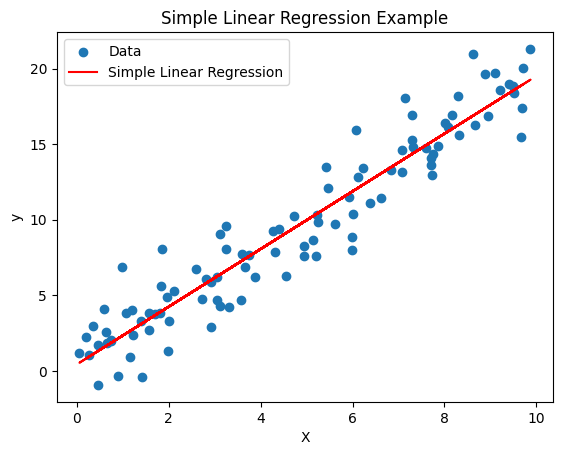

In [15]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
X = np.random.rand(100, 1) * 10
y = 2 * X + np.random.randn(100, 1) * 2

# Create a DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Perform simple linear regression
regression_simple = LinearRegression()
regression_simple.fit(X, y)

# Print the coefficient and intercept
coefficient = regression_simple.coef_[0][0]
intercept = regression_simple.intercept_[0]
print("Simple Linear Regression Coefficient:", coefficient)
print("Simple Linear Regression Intercept:", intercept)

# Plot the data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X, regression_simple.predict(X), color='red', label='Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

Multiple Linear Regression Coefficients: [1.99084883 3.11078833]
Multiple Linear Regression Intercept: -0.225522654311348


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


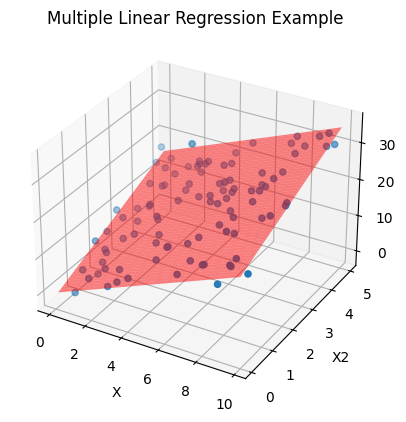

In [16]:
X2 = np.random.rand(100, 1) * 5
y = 2 * X + 3 * X2 + np.random.randn(100, 1) * 2

# Create a DataFrame
data = pd.DataFrame({'X': X.flatten(), 'X2': X2.flatten(), 'y': y.flatten()})

# Perform multiple linear regression
regression_multiple = LinearRegression()
regression_multiple.fit(data[['X', 'X2']], data['y'])

# Print the coefficients
coefficients = regression_multiple.coef_
intercept = regression_multiple.intercept_
print("Multiple Linear Regression Coefficients:", coefficients)
print("Multiple Linear Regression Intercept:", intercept)

# Create meshgrid for 3D plot
X_mesh, X2_mesh = np.meshgrid(np.linspace(X.min(), X.max(), 100), np.linspace(X2.min(), X2.max(), 100))
X_flat = X_mesh.flatten().reshape(-1, 1)
X2_flat = X2_mesh.flatten().reshape(-1, 1)
X_combined = np.concatenate((X_flat, X2_flat), axis=1)
y_mesh = regression_multiple.predict(X_combined).reshape(X_mesh.shape)

# Plot the data points and regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X'], data['X2'], data['y'], label='Data')
ax.plot_surface(X_mesh, X2_mesh, y_mesh, alpha=0.5, color='red', label='Multiple Linear Regression')
ax.set_xlabel('X')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Regression Example')
plt.show()

1. Simple Linear Regression:
- Simple Linear Regression Coefficient: 1.9080453545753935
- Simple Linear Regression Intercept: 0.43019231509349787

In simple linear regression, we have a single independent variable (X) and a dependent variable (y). The coefficient of 1.9080453545753935 indicates that for each unit increase in X, the predicted value of y increases by approximately 1.908. The intercept value of 0.43019231509349787 represents the estimated y value when X is 0.

2. Multiple Linear Regression:
- Multiple Linear Regression Coefficients: [1.99084883 3.11078833]
- Multiple Linear Regression Intercept: -0.225522654311348

In multiple linear regression, we have multiple independent variables (X and X2) along with the dependent variable (y). The coefficients of [1.99084883, 3.11078833] represent the estimated impact of each independent variable on the dependent variable. For example, for each unit increase in X, holding X2 constant, the predicted value of y increases by approximately 1.990. Similarly, for each unit increase in X2, holding X constant, the predicted value of y increases by approximately 3.110. The intercept value of -0.225522654311348 represents the estimated y value when both X and X2 are 0.

#### Observations:

  - Simple linear regression focuses on the relationship between a single independent variable and a dependent variable. It assumes a linear relationship between the variables.
  - Multiple linear regression extends simple linear regression by incorporating multiple independent variables. It allows for capturing the combined effects of multiple predictors on the dependent variable.
  - Comparing the coefficients between simple and multiple linear regression, we can observe that the coefficient values may change when additional variables are included. This is because the inclusion of more predictors allows the model to capture more complex relationships and explain more variability in the dependent variable.
  - The intercept values can also differ between the two models, as they represent the predicted value of the dependent variable when all independent variables are zero.

#### Conclusion:
  - Based on the given coefficients, we can conclude that both X and X2 have a positive impact on the dependent variable y in the multiple linear regression model.
  - Additionally, we can infer that X2 has a greater influence on y compared to X as the coefficient of X2 is larger.
  - It's important to note that these conclusions are specific to the given dataset and should be interpreted within the context of the dataset and the underlying assumptions of linear regression.

### 13. How do you interpret the R-squared value in regression?

  Answer: R-squared, also known as the coefficient of determination, measures the proportion of variance in the dependent variable that is explained by the independent variables in the regression model. It ranges from 0 to 1, with a higher value indicating a better fit. It represents the goodness-of-fit of the model, but it does not provide information about causality or the significance of individual predictors.

In [17]:
# Calculate R-squared for Simple Linear Regression
r2_simple = r2_score(y, regression_simple.predict(X))
print("R-squared for Simple Linear Regression:", r2_simple)

# Calculate R-squared for Multiple Linear Regression
r2_multiple = r2_score(data['y'], regression_multiple.predict(data[['X', 'X2']]))
print("R-squared for Multiple Linear Regression:", r2_multiple)

R-squared for Simple Linear Regression: -0.5332702007545753
R-squared for Multiple Linear Regression: 0.9434703597398351


1. Simple Linear Regression:

  - The R-squared value for the Simple Linear Regression model is -0.5333.
  - A negative R-squared value indicates that the model does not fit the data well.
  - In this case, the negative R-squared value suggests that the model does not explain the variance in the dependent variable (y) using the single independent variable (X).
  - This indicates that the linear relationship between X and y is not well captured by the simple linear regression model in this particular case.

2. Multiple Linear Regression:

  - The R-squared value for the Multiple Linear Regression model is 0.9435.
  - A high positive R-squared value close to 1 indicates that the model fits the data well and explains a large proportion of the variance in the dependent variable (y).
  - In this case, the R-squared value of 0.9435 suggests that the multiple linear regression model provides a strong fit to the data.
  - Approximately 94.35% of the variance in y can be explained by the independent variables (X and X2) in the multiple linear regression model.
  - This indicates that the model captures a significant portion of the relationship between the independent variables and the dependent variable, resulting in a good predictive power.

#### Conclusion:

- The Simple Linear Regression model does not fit the data well in this case, as indicated by the negative R-squared value.
- However, the Multiple Linear Regression model provides a strong fit to the data, explaining a substantial amount of the variance in the dependent variable.
- It's important to note that the interpretation of R-squared values should consider the specific context, underlying assumptions, and limitations of the dataset and regression analysis.

Based on these results, we can conclude that the Multiple Linear Regression model, incorporating both X and X2, is a better fit for the given data compared to the Simple Linear Regression model.

### 14. What is the difference between correlation and regression?

  Answer: Correlation measures the strength and direction of the linear relationship between two variables, while regression analyzes the relationship and provides a mathematical equation to estimate the dependent variable based on the independent variables. Regression goes beyond correlation by estimating the effect of the independent variables on the dependent variable and making predictions.


### 15. What is the difference between the coefficients and the intercept in regression?

  Answer: In regression, the coefficients represent the estimated impact of each independent variable on the dependent variable. They indicate the change in the dependent variable associated with a one-unit change in the respective independent variable, holding other variables constant. The intercept is the value of the dependent variable when all independent variables are set to zero.

### 16. How do you handle outliers in regression analysis?

  Answer: Outliers can have a significant impact on regression analysis. Handling outliers depends on the context and the reason for their occurrence. Some approaches include removing outliers based on predetermined criteria, transforming the data, using robust regression techniques that are less sensitive to outliers, or considering the possibility of influential outliers in the analysis.

### 17. What is the difference between ridge regression and ordinary least squares regression?

  Answer: Ordinary least squares (OLS) regression aims to minimize the sum of squared residuals to fit a model. Ridge regression is a regularized form of regression that adds a penalty term to the sum of squared residuals to control the model's complexity and reduce overfitting. Ridge regression helps to handle multicollinearity by shrinking the coefficients towards zero.

### 18. What is heteroscedasticity in regression and how does it affect the model?

  Answer: Heteroscedasticity refers to the unequal spread or variability of the residuals across the range of the independent variables. It violates the assumption of constant variance in the error term of regression. Heteroscedasticity can affect the model by producing inefficient and biased estimates of the coefficients. It may require applying data transformations or using robust regression techniques to address the issue.

### 19. How do you handle multicollinearity in regression analysis?

  Answer: Multicollinearity occurs when two or more independent variables in regression are highly correlated. It can lead to unstable and unreliable coefficient estimates. To handle multicollinearity, one can consider dropping one of the correlated variables, transforming the variables, using dimensionality reduction techniques, or employing regularization methods like ridge regression or lasso regression.

### 20. What is polynomial regression and when is it used?

  Answer: Polynomial regression is a form of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. It is used when the relationship between the variables is nonlinear. Polynomial regression can capture curved relationships and provide a better fit to the data when a straight line (simple linear regression) is not sufficient.

# Loss function:

### 21. What is a loss function and what is its purpose in machine learning?

  Answer: A loss function, also known as a cost function or objective function, is a mathematical function that measures the discrepancy between the predicted output and the true target value in machine learning. Its purpose is to quantify the error or loss of a machine learning model and guide the learning process by optimizing the model's parameters to minimize the loss.

### 22. What is the difference between a convex and non-convex loss function?

  Answer: The difference between a convex and non-convex loss function lies in their shape and properties:

  - Convex Loss Function: A convex loss function has a single global minimum and is bowl-shaped. Gradient-based optimization algorithms are guaranteed to find the global minimum when minimizing a convex loss function. Examples of convex loss functions include mean squared error (MSE) and mean absolute error (MAE).

  - Non-convex Loss Function: A non-convex loss function has multiple local minima and may have a more complex shape. Optimizing a non-convex loss function is challenging because the choice of initial parameters can impact the optimization result, leading to convergence to local minima instead of the global minimum. Examples of non-convex loss functions include log loss (cross-entropy loss) and Huber loss.

### 23. What is mean squared error (MSE) and how is it calculated?

  Answer: Mean Squared Error (MSE) is a commonly used loss function that measures the average squared difference between the predicted values and the true values. It is calculated by summing the squared differences and dividing by the number of samples or instances:

<center>MSE = (1/n) * Σ(y_true - y_pred)^2</center>



### 24. What is mean absolute error (MAE) and how is it calculated?

  Answer: Mean Absolute Error (MAE) is another popular loss function that measures the average absolute difference between the predicted values and the true values. It is calculated by summing the absolute differences and dividing by the number of samples or instances:
<center>MAE = (1/n) * Σ|y_true - y_pred|</center>

### 25. What is log loss (cross-entropy loss) and how is it calculated?

  Answer: Log Loss, also known as cross-entropy loss or binary cross-entropy, is commonly used in classification tasks. It measures the performance of a classification model that outputs probabilities between 0 and 1. Log loss calculates the logarithm of the predicted probabilities for the true class label:
<center>Log Loss = -Σ(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))</center>

### 26. How do you choose the appropriate loss function for a given problem?

  Answer: The choice of an appropriate loss function depends on the specific problem, the nature of the data, and the learning task at hand. Some considerations for selecting a loss function include:

  1. The type of problem: Regression, classification, or other specific tasks.

  2. The desired behavior: For example, whether outliers should be heavily penalized or the model should be robust to noise.

  3. The properties of the loss function: Convexity, differentiability, and interpretability.

  4. The distribution of the target variable: Some loss functions may be better suited for certain distributions.

### 27. Explain the concept of regularization in the context of loss functions.

  Answer: Regularization is a technique used to prevent overfitting in machine learning models. In the context of loss functions, regularization involves adding a penalty term to the loss function to discourage complex models or excessive reliance on certain features. It helps to control the model's complexity and reduce the risk of overfitting by balancing the trade-off between model fit to the training data and generalization to unseen data.

### 28. What is Huber loss and how does it handle outliers?

  Answer: Huber Loss is a loss function that is less sensitive to outliers compared to squared loss (MSE). It combines the best properties of squared loss and absolute loss by using a squared term for small errors and an absolute term for larger errors. Huber loss provides a robust measure of error that is less affected by outliers.

### 29. What is quantile loss and when is it used?

  Answer: Quantile Loss, also known as pinball loss, is used in quantile regression. It measures the difference between the predicted quantiles and the true quantiles of the target variable. Quantile loss allows modeling different quantiles of the conditional distribution and provides a way to capture the uncertainty and heteroscedasticity in the data.

### 30. What is the difference between squared loss and absolute loss?

  Answer: The difference between squared loss (MSE) and absolute loss (MAE) lies in how they penalize prediction errors:

- Squared Loss: Squared loss penalizes larger errors more heavily due to the squared term. It amplifies the impact of outliers on the loss function and is sensitive to extreme values.

- Absolute Loss: Absolute loss treats all errors equally and does not amplify the impact of outliers. It provides a more robust measure of error and is less affected by extreme values. However, it may lead to more emphasis on small errors and underestimation of large errors.

The choice of squared loss or absolute loss depends on the specific requirements of the problem, the sensitivity to outliers, and the desired behavior of the model.

# Optimizer (GD):

### 31. What is an optimizer and what is its purpose in machine learning?

  Answer: An optimizer is an algorithm or method used to minimize the loss or error of a machine learning model by adjusting its parameters. Its purpose is to find the optimal values of the model's parameters that result in the best possible performance on the training data.

### 32. What is Gradient Descent (GD) and how does it work?

  Answer: Gradient Descent (GD) is an optimization algorithm used to iteratively update the parameters of a model in the direction of the negative gradient of the loss function. It works by taking steps proportional to the negative of the gradient to reach the minimum of the loss function.


### 33. What are the different variations of Gradient Descent?

  Answer:
  - Batch Gradient Descent (BGD): Updates the parameters using the gradients computed on the entire training dataset in each iteration.
  - Stochastic Gradient Descent (SGD): Updates the parameters using the gradients computed on a single training example at a time.
  - Mini-Batch Gradient Descent: Updates the parameters using the gradients computed on a small subset or mini-batch of training examples.


### 34. What is the learning rate in GD and how do you choose an appropriate value?

  Answer: The learning rate in GD determines the step size taken in the direction of the gradient during parameter updates. Choosing an appropriate learning rate is crucial, as a small value may lead to slow convergence, while a large value may cause the optimization process to oscillate or diverge. The learning rate is typically chosen through experimentation, trying different values and observing the convergence behavior.


### 35. How does GD handle local optima in optimization problems?

  Answer: Gradient Descent handles local optima by taking steps in the direction of the negative gradient, gradually moving towards the global minimum of the loss function. However, it is possible to get stuck in a suboptimal local minimum if the loss function is non-convex. In practice, the choice of optimization algorithm and initialization strategy can impact the ability to escape local optima.


### 36. What is Stochastic Gradient Descent (SGD) and how does it differ from GD?

  Answer: Stochastic Gradient Descent (SGD) is a variation of Gradient Descent that updates the parameters using the gradients computed on a single training example at a time. Unlike GD, which computes gradients on the entire dataset, SGD processes one example at a time, making it faster but more noisy. SGD tends to have more fluctuations in the loss function but can converge faster, especially in large-scale datasets.


### 37. Explain the concept of batch size in GD and its impact on training.

  Answer: Batch size in GD refers to the number of training examples used in each iteration to compute the gradients and update the parameters. It affects the trade-off between computation efficiency and convergence speed. Using a larger batch size (e.g., full batch GD) can provide more accurate gradients but requires more memory and computational resources. Smaller batch sizes (e.g., mini-batch GD) introduce more noise but can converge faster.


### 38. What is the role of momentum in optimization algorithms?

  Answer: Momentum is a concept in optimization algorithms that helps accelerate the convergence by adding a fraction of the previous parameter update to the current update. It enables the optimizer to accumulate momentum in directions where the gradients consistently point, allowing faster traversal of flat regions and overcoming local optima.


### 39. What is the difference between batch GD, mini-batch GD, and SGD?

  Answer: The difference between Batch GD, Mini-Batch GD, and SGD lies in the amount of data used to compute gradients and update the parameters:

  - Batch Gradient Descent (BGD): Computes gradients and updates parameters using the entire training dataset in each iteration.
  - Mini-Batch Gradient Descent: Computes gradients and updates parameters using a small subset or mini-batch of training examples.
  - Stochastic Gradient Descent (SGD): Computes gradients and updates parameters using a single training example at a time.


### 40. How does the learning rate affect the convergence of GD?

  Answer: The learning rate affects the convergence of GD by determining the step size taken in the direction of the gradient. A small learning rate may cause slow convergence or getting stuck in local minima, while a large learning rate can cause oscillation or divergence. The learning rate needs to be carefully chosen to ensure a balance between convergence speed and stability. Techniques like learning rate schedules or adaptive learning rate methods can be used to optimize the learning rate during training.




# Regularization:

### 41. What is regularization and why is it used in machine learning?

  Answer: Regularization is a technique used in machine learning to prevent overfitting and improve the generalization performance of models. It involves adding a penalty term to the loss function during training to discourage complex or over-reliant models on certain features. Regularization helps to control the model's complexity and reduce the risk of overfitting by finding a balance between fitting the training data well and generalizing to unseen data.

### 42. What is the difference between L1 and L2 regularization?

  Answer: L1 (Lasso) and L2 (Ridge) regularization are two commonly used regularization techniques:

  - L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the model's weights. It encourages sparsity in the weight vector, effectively selecting a subset of the most important features and shrinking less important features to zero.
  - L2 regularization adds a penalty term to the loss function that is proportional to the squared magnitude of the model's weights. It encourages smaller weights and reduces the impact of individual features without setting them exactly to zero.

### 43. Explain the concept of ridge regression and its role in regularization.

  Answer: Ridge regression is a linear regression technique that incorporates L2 regularization. It adds a penalty term to the loss function that is proportional to the squared magnitude of the regression coefficients. This encourages the model to have smaller weights, making it less sensitive to the input data and reducing the impact of multicollinearity. Ridge regression helps to stabilize the model and improve its generalization performance by balancing the trade-off between bias and variance.

### 44. What is the elastic net regularization and how does it combine L1 and L2 penalties?

  Answer: Elastic Net regularization is a combination of L1 (Lasso) and L2 (Ridge) regularization. It adds a penalty term to the loss function that combines both L1 and L2 penalties. Elastic Net regularization allows for variable selection and encourages sparsity (like L1 regularization), while also handling correlated features effectively (like L2 regularization). The relative contribution of L1 and L2 penalties can be controlled by a mixing parameter.

### 45. How does regularization help prevent overfitting in machine learning models?

  Answer: Regularization helps prevent overfitting by adding a penalty term to the loss function that discourages complex or overly specific models. By introducing a bias towards simpler models, regularization prevents the model from learning the noise or idiosyncrasies in the training data. It helps to regularize the model's parameters and reduces the impact of irrelevant or noisy features, improving the model's ability to generalize well to unseen data.

### 46. What is early stopping and how does it relate to regularization?

  Answer: Early stopping is a technique used to prevent overfitting by monitoring the model's performance on a separate validation set during training. The training process is stopped early when the model's performance on the validation set starts to deteriorate or does not improve significantly. Early stopping can be seen as a form of regularization as it prevents the model from continuing to learn complex patterns in the training data that may not generalize well to new data.

### 47. Explain the concept of dropout regularization in neural networks.

  Answer: Dropout regularization is a technique used in neural networks to reduce overfitting. It randomly sets a fraction of the input neurons or units to zero during each training iteration. This forces the network to learn redundant representations and prevents units from relying too heavily on specific features. Dropout acts as a form of model averaging and helps improve the network's generalization ability.

### 48. How do you choose the regularization parameter in a model?

  Answer: The regularization parameter, also known as the regularization strength or lambda (λ), controls the amount of regularization applied to the model. The optimal value of the regularization parameter depends on the specific dataset and problem at hand. It can be chosen through techniques like cross-validation, grid search, or using model selection criteria like Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC). The regularization parameter is typically tuned by evaluating the model's performance on a validation set or through nested cross-validation.

### 49. What is the difference between feature selection and regularization?

  Answer: Feature selection aims to identify and select a subset of relevant features from the original feature set, discarding the less important ones. It reduces the dimensionality of the data by excluding irrelevant or redundant features. Regularization, on the other hand, is a technique that modifies the loss function by adding a penalty term to discourage complex or over-reliant models on certain features. Regularization helps to control the model's complexity and reduce overfitting by shrinking or discouraging certain weights or coefficients.

### 50. What is the trade-off between bias and variance in regularized models?

  Answer: In regularized models, there is a trade-off between bias and variance. By introducing regularization, the model's complexity is reduced, leading to higher bias or a tendency to underfit the training data. Regularization helps to prevent overfitting and reduce variance, which is the model's sensitivity to fluctuations in the training data. The goal is to find the optimal balance between bias and variance that minimizes the overall error on unseen data, resulting in better generalization performance.

# SVM:

### 51. What is Support Vector Machines (SVM) and how does it work?

  Answer: Support Vector Machines (SVM) is a supervised machine learning algorithm used for both classification and regression tasks. SVM aims to find an optimal hyperplane that separates data points of different classes or predicts continuous values. It maximizes the margin, which is the distance between the hyperplane and the nearest data points.

### 52. How does the kernel trick work in SVM?

  Answer: The kernel trick is a technique used in SVM to handle non-linearly separable data. It transforms the original input space into a higher-dimensional feature space using a kernel function. By applying the kernel function, SVM can implicitly compute the dot product between data points in the high-dimensional feature space without explicitly mapping them into that space. This allows SVM to find non-linear decision boundaries in the original input space.

### 53. What are support vectors in SVM and why are they important?

  Answer: Support vectors in SVM are the data points from the training set that lie closest to the decision boundary or within the margin. They play a crucial role in determining the position and orientation of the decision boundary. Only the support vectors influence the construction of the decision boundary, while other data points outside the margin have no impact on it. The support vectors are important because they define the structure of the model and contribute to the model's generalization performance.

### 54. Explain the concept of the margin in SVM and its impact on model performance.

  Answer: The margin in SVM refers to the region around the decision boundary that separates different classes. It is the minimum distance between the decision boundary and the nearest data points from each class. Maximizing the margin is a key objective of SVM. A larger margin indicates better separation between classes and can lead to improved generalization performance by reducing the risk of misclassification on unseen data.

### 55. How do you handle unbalanced datasets in SVM?

  Answer: Handling unbalanced datasets in SVM can be done using techniques such as:

  - Adjusting class weights: Assigning higher weights to the minority class to increase its influence during training and balance the impact of the imbalanced classes.
  - Undersampling or oversampling: Creating a balanced dataset by randomly undersampling the majority class or oversampling the minority class to match the number of samples in the minority and majority classes.
  - Using different performance metrics: Focusing on evaluation metrics that are less sensitive to class imbalance, such as precision, recall, F1-score, or using techniques like area under the ROC curve (AUC-ROC).

### 56. What is the difference between linear SVM and non-linear SVM?

  Answer: The difference between linear SVM and non-linear SVM lies in the decision boundary they can create:
  - Linear SVM: Constructs a linear decision boundary in the input space. It is suitable for problems where the classes can be separated by a straight line or a hyperplane.
  - Non-linear SVM: Utilizes the kernel trick to transform the input space into a higher-dimensional feature space. It can create non-linear decision boundaries, allowing for more complex separation of classes.

### 57. What is the role of C-parameter in SVM and how does it affect the decision boundary?

  Answer: The C-parameter in SVM controls the trade-off between maximizing the margin and minimizing the classification error. It influences the regularization strength and determines the tolerance for misclassifying training samples. A smaller value of C leads to a wider margin but may result in more misclassifications, allowing for a more flexible decision boundary. Conversely, a larger C value results in a narrower margin and fewer misclassifications, potentially leading to a more strict decision boundary.

### 58. Explain the concept of slack variables in SVM.

  Answer: Slack variables in SVM are introduced in soft margin classification to handle data points that are not linearly separable. They allow some samples to fall within the margin or even on the wrong side of the decision boundary, while still maintaining a balance between maximizing the margin and controlling the classification errors. Slack variables measure the degree of misclassification and are added to the objective function to penalize misclassifications.

### 59. What is the difference between hard margin and soft margin in SVM?

  Answer: The difference between hard margin and soft margin in SVM lies in the level of strictness applied to the separation of classes:

  - Hard margin SVM: Assumes that the data is linearly separable and aims to find a decision boundary that perfectly separates the classes without any misclassifications. It requires all training samples to be correctly classified, leading to a narrow margin and potentially sensitive to outliers.
  - Soft margin SVM: Allows for a certain degree of misclassification and errors in the training data. It introduces slack variables to tolerate misclassifications, creating a wider margin and allowing for some flexibility in the decision boundary. Soft margin SVM is more robust to noise and outliers.

### 60. How do you interpret the coefficients in an SVM model?

  Answer: In an SVM model, the coefficients are often referred to as the support vector weights or dual coefficients. The coefficients represent the importance or contribution of the support vectors in determining the position and orientation of the decision boundary. The sign and magnitude of the coefficients indicate the influence of each support vector on the classification decision. Positive coefficients suggest points belonging to one class, while negative coefficients suggest points belonging to the other class. The larger the coefficient, the more influential the support vector is in determining the decision boundary.

# Decision Trees:


### 61. What is a decision tree and how does it work?

  Answer: A decision tree is a supervised machine learning algorithm that is used for both classification and regression tasks. It works by partitioning the data into subsets based on the values of input features and making decisions at each node of the tree. It recursively splits the data based on certain criteria until it reaches leaf nodes that represent the predicted output.

### 62. How do you make splits in a decision tree?

  Answer: In a decision tree, splits are made at each node to divide the data based on the values of a specific feature. The goal is to find the best feature and its corresponding threshold that results in the most significant separation between the target classes or reduces the variance in the target variable. The process involves evaluating different splitting criteria to determine the most informative and discriminative features.

### 63. What are impurity measures (e.g., Gini index, entropy) and how are they used in decision trees?

  Answer: Impurity measures, such as the Gini index and entropy, are used in decision trees to determine the quality of a split or the homogeneity of the target variable within each subset. They help in selecting the optimal split that maximizes the separation between the classes or minimizes the disorder within the subsets. Here's a brief explanation of these impurity measures:

  - Gini index: It measures the probability of incorrectly classifying a randomly chosen element from a set. A lower Gini index indicates a purer subset, where all elements belong to the same class. The Gini index is calculated as the sum of the squared probabilities of each class being chosen multiplied by (1 - the probability of that class).
  - Entropy: It measures the amount of uncertainty or disorder in a set. A lower entropy value indicates a more homogeneous subset. Entropy is calculated as the sum of the negative probabilities of each class multiplied by their logarithm (base 2).
  
Both impurity measures are used in decision trees to evaluate different splits and determine the one that results in the highest reduction in impurity or information gain. The chosen impurity measure depends on the specific problem and the desired behavior of the decision tree algorithm.